<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [3]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import optimizers
import tensorflow as tf

keras:  2.11.0


## Step 1: Data Loading

In [4]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train') 
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation') 

In [5]:
img_size = 150
train_datagenaug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generatoraug = train_datagenaug.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [6]:

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=50,

        class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50, 10)


## Step 2:  Develop the Image Classification Models

### Model #1

lets start with base model 1a where we will scale the model until it overfits and the optimize the model.

In [6]:
#Base 1
#verion 1
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/50
150/150 [==============================] - 99s 652ms/step - loss: 2.1723 - acc: 0.2091 - val_loss: 2.0231 - val_acc: 0.2755
Epoch 2/50
150/150 [==============================] - 93s 617ms/step - loss: 1.9702 - acc: 0.3009 - val_loss: 1.9602 - val_acc: 0.2975
Epoch 3/50
150/150 [==============================] - 96s 640ms/step - loss: 1.8633 - acc: 0.3412 - val_loss: 1.8853 - val_acc: 0.3330
Epoch 4/50
150/150 [==============================] - 96s 637ms/step - loss: 1.7831 - acc: 0.3716 - val_loss: 1.7748 - val_acc: 0.3875
Epoch 5/50
150/150 [==============================] - 96s 640ms/step - loss: 1.7124 - acc: 0.3991 - val_loss: 1.7716 - val_acc: 0.3865
Epoch 6/50
150/150 [==============================] - 96s 642ms/step - loss: 1.6374 - acc: 0.4332 - val_loss: 1.7933 - val_acc: 0.3690
Epoch 7/50
150/150 [==============================] - 96s 638ms/step - loss: 1.5757 - acc: 0.4583 - val_loss: 1.7006 - val_acc: 0.4175
Epoch 8/50
150/150 [==============================] - 9

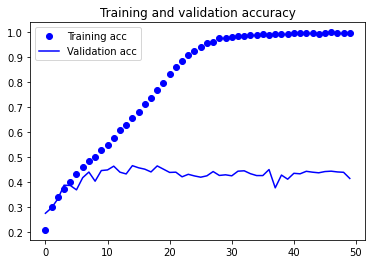

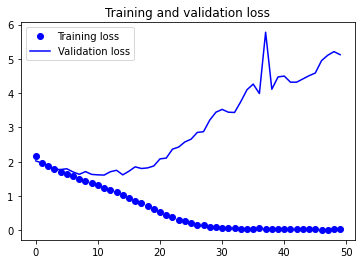

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 220ms/step - loss: 5.2322 - acc: 0.4180
test acc: 0.4180000126361847


as you can see overfitting occurs before the 10th epoch, we need to optimize the model to help prevent overfitting so early. We will be adding dropout layers as well as data augmentation. Since we are expecting overfitting to occur later, we will also be increasing the epoch so that we can observe the overfit.

In [15]:
#Base 1
#version 2
from tensorflow.keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)       

In [16]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 50 to 70
      epochs=70,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/70
150/150 [==============================] - 113s 746ms/step - loss: 2.3000 - acc: 0.1265 - val_loss: 2.2788 - val_acc: 0.1740
Epoch 2/70
150/150 [==============================] - 115s 764ms/step - loss: 2.2336 - acc: 0.1716 - val_loss: 2.2421 - val_acc: 0.2095
Epoch 3/70
150/150 [==============================] - 114s 762ms/step - loss: 2.1912 - acc: 0.1985 - val_loss: 2.1876 - val_acc: 0.2510
Epoch 4/70
150/150 [==============================] - 113s 754ms/step - loss: 2.1219 - acc: 0.2332 - val_loss: 2.1157 - val_acc: 0.2875
Epoch 5/70
150/150 [==============================] - 113s 753ms/step - loss: 2.0705 - acc: 0.2520 - val_loss: 2.0513 - val_acc: 0.2680
Epoch 6/70
150/150 [==============================] - 116s 773ms/step - loss: 2.0268 - acc: 0.2707 - val_loss: 2.0362 - val_acc: 0.2705
Epoch 7/70
150/150 [==============================] - 115s 765ms/step - loss: 1.9989 - acc: 0.2775 - val_loss: 1.9875 - val_acc: 0.3100
Epoch 8/70
150/150 [============================

Epoch 61/70
150/150 [==============================] - 131s 872ms/step - loss: 1.4432 - acc: 0.5012 - val_loss: 1.6646 - val_acc: 0.4455
Epoch 62/70
150/150 [==============================] - 130s 867ms/step - loss: 1.4460 - acc: 0.4983 - val_loss: 1.6888 - val_acc: 0.4375
Epoch 63/70
150/150 [==============================] - 130s 864ms/step - loss: 1.4388 - acc: 0.5043 - val_loss: 1.5930 - val_acc: 0.4665
Epoch 64/70
150/150 [==============================] - 122s 808ms/step - loss: 1.4371 - acc: 0.5056 - val_loss: 1.8000 - val_acc: 0.4125
Epoch 65/70
150/150 [==============================] - 121s 806ms/step - loss: 1.4353 - acc: 0.5079 - val_loss: 1.7660 - val_acc: 0.4245
Epoch 66/70
150/150 [==============================] - 118s 784ms/step - loss: 1.4188 - acc: 0.5107 - val_loss: 1.7769 - val_acc: 0.4220
Epoch 67/70
150/150 [==============================] - 121s 806ms/step - loss: 1.4154 - acc: 0.5081 - val_loss: 1.8279 - val_acc: 0.4225
Epoch 68/70
150/150 [====================

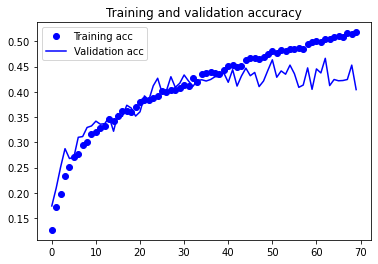

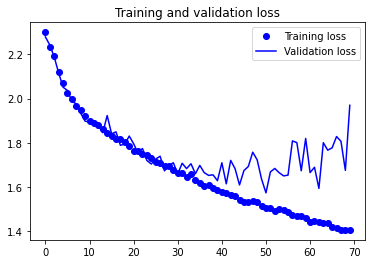

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 234ms/step - loss: 1.9076 - acc: 0.4160
test acc: 0.41600000858306885


After implementing the overfitting prevention techniques, the overfitting was slightly improved and delayed all the way till 30-40 epochs as compared to the previous version of the model where overfitting occured before the 10th epoch. Next we will try other overfitting methods such as the addition of regularizationas well as batch normalization. The training epochs are also increased since we expect overfitting to occur later. after reading through 2 papers( http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf) and (https://arxiv.org/pdf/1207.0580.pdf) I realized that the dropout layers needed to be adjusted, the papers suggested that we should either completely remove dropout layers after conv layers or add drop out layers with very low p values (eg. 0.1 or 0.2). It was recommended that drop out layer of 0.2 added after the input layer helpes improve classification. 

In [24]:
#base 1
#version 3
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_15 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 64)      

In [25]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 135s 890ms/step - loss: 14.7309 - acc: 0.2041 - val_loss: 14.9246 - val_acc: 0.1000
Epoch 2/100
150/150 [==============================] - 134s 889ms/step - loss: 13.7694 - acc: 0.2477 - val_loss: 14.1614 - val_acc: 0.1190
Epoch 3/100
150/150 [==============================] - 139s 923ms/step - loss: 12.8909 - acc: 0.2788 - val_loss: 12.7284 - val_acc: 0.1905
Epoch 4/100
150/150 [==============================] - 137s 915ms/step - loss: 12.0609 - acc: 0.2855 - val_loss: 11.4873 - val_acc: 0.2410
Epoch 5/100
150/150 [==============================] - 135s 897ms/step - loss: 11.2228 - acc: 0.3032 - val_loss: 10.5079 - val_acc: 0.3325
Epoch 6/100
150/150 [==============================] - 134s 891ms/step - loss: 10.4064 - acc: 0.3279 - val_loss: 9.9070 - val_acc: 0.3000
Epoch 7/100
150/150 [==============================] - 136s 905ms/step - loss: 9.6650 - acc: 0.3373 - val_loss: 9.2804 - val_acc: 0.3295
Epoch 8/100
150/150 [=========

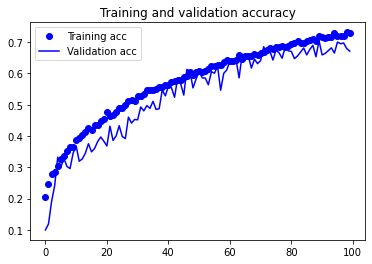

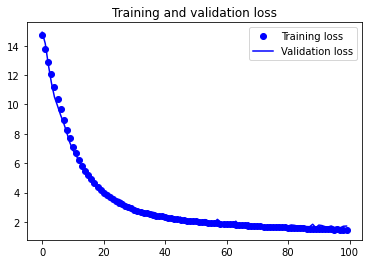

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 220ms/step - loss: 1.7918 - acc: 0.6220
test acc: 0.621999979019165


In [ ]:
scale up

In [50]:
#base 1
#version 3.1adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_77 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_72 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_74 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 36, 36, 64)     

In [51]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 131s 855ms/step - loss: 14.8157 - acc: 0.2075 - val_loss: 14.8871 - val_acc: 0.1000
Epoch 2/120
150/150 [==============================] - 127s 845ms/step - loss: 13.8996 - acc: 0.2564 - val_loss: 14.0551 - val_acc: 0.1500
Epoch 3/120
150/150 [==============================] - 130s 868ms/step - loss: 13.1770 - acc: 0.2801 - val_loss: 12.8186 - val_acc: 0.2235
Epoch 4/120
150/150 [==============================] - 128s 851ms/step - loss: 12.4685 - acc: 0.2909 - val_loss: 12.3646 - val_acc: 0.2325
Epoch 5/120
150/150 [==============================] - 128s 850ms/step - loss: 11.7669 - acc: 0.3132 - val_loss: 11.4772 - val_acc: 0.3065
Epoch 6/120
150/150 [==============================] - 128s 849ms/step - loss: 11.1137 - acc: 0.3229 - val_loss: 10.8919 - val_acc: 0.3215
Epoch 7/120
150/150 [==============================] - 128s 850ms/step - loss: 10.4715 - acc: 0.3412 - val_loss: 10.0545 - val_acc: 0.3565
Epoch 8/120
150/150 [======

150/150 [==============================] - 128s 849ms/step - loss: 1.3422 - acc: 0.7779 - val_loss: 1.7137 - val_acc: 0.6785
Epoch 120/120
150/150 [==============================] - 127s 847ms/step - loss: 1.3202 - acc: 0.7895 - val_loss: 1.7455 - val_acc: 0.6655


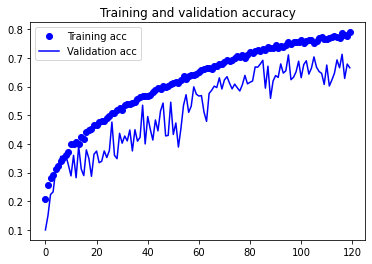

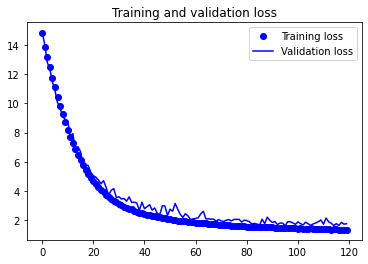

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 211ms/step - loss: 1.7680 - acc: 0.6480
test acc: 0.6480000019073486


In [54]:
#base 1
#verison 3.2 adadelta with normal aug
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.Adadelta(learning_rate=1.0,rho=0.95,epsilon =None,decay = 0.0),
              metrics=['acc'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_82 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_77 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_78 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 36, 36, 64)     

In [55]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 126s 835ms/step - loss: 11.5748 - acc: 0.2211 - val_loss: 8.7337 - val_acc: 0.1210
Epoch 2/120
150/150 [==============================] - 126s 838ms/step - loss: 5.5587 - acc: 0.2749 - val_loss: 5.4720 - val_acc: 0.1000
Epoch 3/120
150/150 [==============================] - 125s 832ms/step - loss: 3.4806 - acc: 0.2996 - val_loss: 3.4212 - val_acc: 0.1680
Epoch 4/120
150/150 [==============================] - 124s 825ms/step - loss: 2.9349 - acc: 0.3267 - val_loss: 2.8141 - val_acc: 0.2615
Epoch 5/120
150/150 [==============================] - 124s 823ms/step - loss: 2.7457 - acc: 0.3332 - val_loss: 2.6562 - val_acc: 0.3200
Epoch 6/120
150/150 [==============================] - 124s 827ms/step - loss: 2.6015 - acc: 0.3509 - val_loss: 2.5550 - val_acc: 0.3165
Epoch 7/120
150/150 [==============================] - 124s 825ms/step - loss: 2.5194 - acc: 0.3736 - val_loss: 2.3593 - val_acc: 0.4055
Epoch 8/120
150/150 [===================

150/150 [==============================] - 123s 821ms/step - loss: 1.6451 - acc: 0.6511 - val_loss: 1.7341 - val_acc: 0.6070
Epoch 120/120
150/150 [==============================] - 123s 819ms/step - loss: 1.6153 - acc: 0.6591 - val_loss: 1.7044 - val_acc: 0.6280


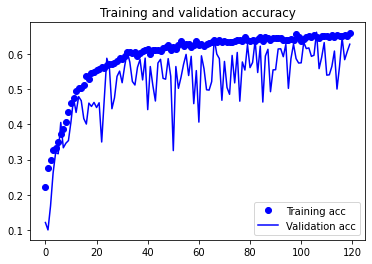

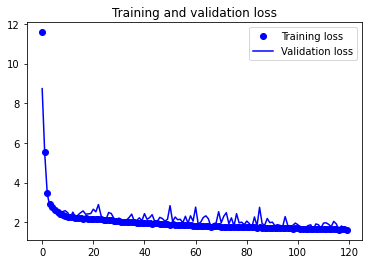

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 195ms/step - loss: 1.7937 - acc: 0.5920
test acc: 0.5920000076293945


as can be seen from the comparison between the adadelta and adams optimizers, the adams optimizer reached higher accuracy levels than the adadelta optimizer and also performed better on training data. We will now attempt to futher improve base 1a version 3.1 to try to delay overfitting and increase the accuracy. Through further reading it was noted that batch normalization and L2 regularization do not work well together, we will first test that on model base 1a version 3.1. I also learnt a lesson that we should not make too many changes to a model per test, this will prevent us from finding our how each changed feature affects the model accuracy.

In [80]:
#base 1
#version 3.1.1 (no l2 reg with batchnorm)

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 dropout_128 (Dropout)       (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_113 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_113 (Ba  (None, 74, 74, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_116 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 36, 36, 64)     

In [81]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 131s 860ms/step - loss: 3.0340 - acc: 0.1981 - val_loss: 3.2510 - val_acc: 0.1000
Epoch 2/120
150/150 [==============================] - 133s 883ms/step - loss: 2.6954 - acc: 0.2495 - val_loss: 3.1728 - val_acc: 0.1215
Epoch 3/120
150/150 [==============================] - 136s 907ms/step - loss: 2.5204 - acc: 0.2748 - val_loss: 2.8756 - val_acc: 0.1810
Epoch 4/120
150/150 [==============================] - 137s 908ms/step - loss: 2.4422 - acc: 0.2819 - val_loss: 2.3524 - val_acc: 0.2385
Epoch 5/120
150/150 [==============================] - 138s 915ms/step - loss: 2.3189 - acc: 0.3009 - val_loss: 2.0567 - val_acc: 0.3200
Epoch 6/120
150/150 [==============================] - 129s 856ms/step - loss: 2.2273 - acc: 0.3223 - val_loss: 1.9677 - val_acc: 0.3385
Epoch 7/120
150/150 [==============================] - 130s 867ms/step - loss: 2.1756 - acc: 0.3277 - val_loss: 1.9788 - val_acc: 0.3665
Epoch 8/120
150/150 [====================

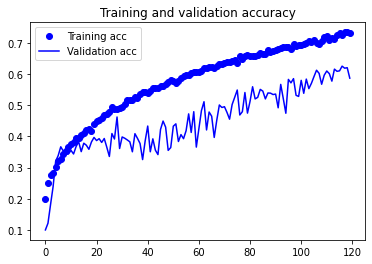

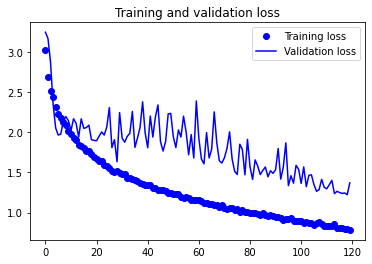

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [83]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 5s 502ms/step - loss: 1.4607 - acc: 0.5800
test acc: 0.5799999833106995


In [84]:
#base 1
#version 3.1.1 (with l2 reg no batchnorm)
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))


model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_119 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 dropout_133 (Dropout)       (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_117 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_120 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 36, 36, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_134 (Dropout)       (None, 36, 36, 64)      

In [85]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 203s 1s/step - loss: 9.9307 - acc: 0.1189 - val_loss: 6.6269 - val_acc: 0.1920
Epoch 2/120
150/150 [==============================] - 201s 1s/step - loss: 5.0641 - acc: 0.1752 - val_loss: 3.9763 - val_acc: 0.2370
Epoch 3/120
150/150 [==============================] - 199s 1s/step - loss: 3.4513 - acc: 0.1971 - val_loss: 3.0338 - val_acc: 0.2445
Epoch 4/120
150/150 [==============================] - 201s 1s/step - loss: 2.8444 - acc: 0.2299 - val_loss: 2.7306 - val_acc: 0.2150
Epoch 5/120
150/150 [==============================] - 204s 1s/step - loss: 2.5949 - acc: 0.2372 - val_loss: 2.5305 - val_acc: 0.2175
Epoch 6/120
150/150 [==============================] - 202s 1s/step - loss: 2.4561 - acc: 0.2456 - val_loss: 2.4053 - val_acc: 0.2645
Epoch 7/120
150/150 [==============================] - 204s 1s/step - loss: 2.3739 - acc: 0.2544 - val_loss: 2.3895 - val_acc: 0.2285
Epoch 8/120
150/150 [==============================] - 210s 1s

Epoch 62/120
150/150 [==============================] - 192s 1s/step - loss: 1.9370 - acc: 0.3712 - val_loss: 1.9761 - val_acc: 0.3505
Epoch 63/120
150/150 [==============================] - 193s 1s/step - loss: 1.9310 - acc: 0.3744 - val_loss: 1.8679 - val_acc: 0.4140
Epoch 64/120
150/150 [==============================] - 186s 1s/step - loss: 1.9314 - acc: 0.3740 - val_loss: 1.9422 - val_acc: 0.3715
Epoch 65/120
150/150 [==============================] - 194s 1s/step - loss: 1.9286 - acc: 0.3776 - val_loss: 1.9533 - val_acc: 0.3625
Epoch 66/120
150/150 [==============================] - 194s 1s/step - loss: 1.9264 - acc: 0.3741 - val_loss: 1.9186 - val_acc: 0.3770
Epoch 67/120
150/150 [==============================] - 194s 1s/step - loss: 1.9314 - acc: 0.3720 - val_loss: 1.9094 - val_acc: 0.3835
Epoch 68/120
150/150 [==============================] - 193s 1s/step - loss: 1.9304 - acc: 0.3789 - val_loss: 1.8832 - val_acc: 0.4000
Epoch 69/120
150/150 [==============================] -

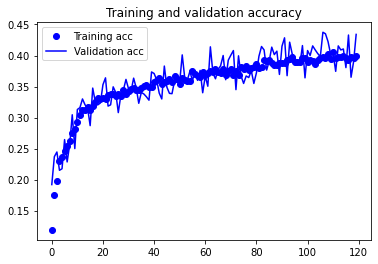

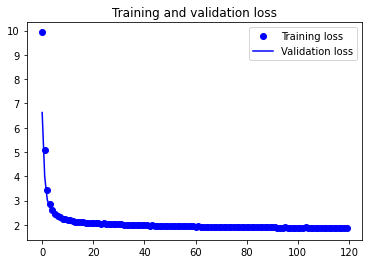

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [87]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 5s 477ms/step - loss: 1.8244 - acc: 0.4160
test acc: 0.41600000858306885


In [88]:
#Base 1
#version 3.1.3 ( no regulizer no batch norm)
from tensorflow.keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_138 (Dropout)       (None, 74, 74, 32)        0         
                                                                 
 conv2d_124 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 36, 36, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_139 (Dropout)       (None, 36, 36, 64)      

In [89]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 172s 1s/step - loss: 2.2968 - acc: 0.1195 - val_loss: 2.2658 - val_acc: 0.1920
Epoch 2/120
150/150 [==============================] - 164s 1s/step - loss: 2.2138 - acc: 0.1832 - val_loss: 2.1756 - val_acc: 0.2475
Epoch 3/120
150/150 [==============================] - 171s 1s/step - loss: 2.1159 - acc: 0.2301 - val_loss: 2.0568 - val_acc: 0.2725
Epoch 4/120
150/150 [==============================] - 170s 1s/step - loss: 2.0506 - acc: 0.2600 - val_loss: 2.0139 - val_acc: 0.3025
Epoch 5/120
150/150 [==============================] - 170s 1s/step - loss: 2.0058 - acc: 0.2869 - val_loss: 1.9637 - val_acc: 0.3265
Epoch 6/120
150/150 [==============================] - 170s 1s/step - loss: 1.9590 - acc: 0.2979 - val_loss: 1.9185 - val_acc: 0.3285
Epoch 7/120
150/150 [==============================] - 169s 1s/step - loss: 1.9279 - acc: 0.3065 - val_loss: 1.8612 - val_acc: 0.3665
Epoch 8/120
150/150 [==============================] - 169s 1s

Epoch 62/120
150/150 [==============================] - 169s 1s/step - loss: 1.2896 - acc: 0.5575 - val_loss: 1.3420 - val_acc: 0.5605
Epoch 63/120
150/150 [==============================] - 170s 1s/step - loss: 1.3203 - acc: 0.5515 - val_loss: 1.3973 - val_acc: 0.5245
Epoch 64/120
150/150 [==============================] - 170s 1s/step - loss: 1.3030 - acc: 0.5540 - val_loss: 1.3975 - val_acc: 0.5390
Epoch 65/120
150/150 [==============================] - 170s 1s/step - loss: 1.2921 - acc: 0.5535 - val_loss: 1.3261 - val_acc: 0.5620
Epoch 66/120
150/150 [==============================] - 163s 1s/step - loss: 1.2866 - acc: 0.5640 - val_loss: 1.4356 - val_acc: 0.5215
Epoch 67/120
150/150 [==============================] - 171s 1s/step - loss: 1.2865 - acc: 0.5588 - val_loss: 1.4205 - val_acc: 0.5300
Epoch 68/120
150/150 [==============================] - 170s 1s/step - loss: 1.2887 - acc: 0.5564 - val_loss: 1.3711 - val_acc: 0.5430
Epoch 69/120
150/150 [==============================] -

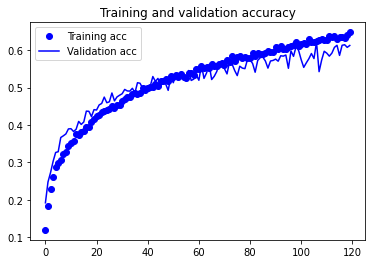

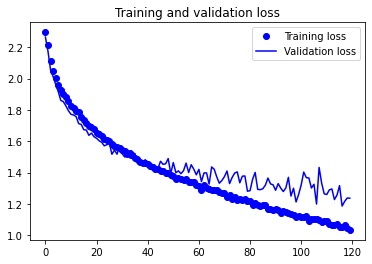

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [91]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 4s 423ms/step - loss: 1.3187 - acc: 0.5760
test acc: 0.5759999752044678


In [92]:
##base 1
#version 3.1.3adam (l1+batch norm)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l1'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l1'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l1'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l1'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 dropout_143 (Dropout)       (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_118 (Ba  (None, 74, 74, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_128 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 36, 36, 64)     

In [93]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 229s 1s/step - loss: 408.9332 - acc: 0.1860 - val_loss: 288.7020 - val_acc: 0.1000
Epoch 2/120
150/150 [==============================] - 234s 2s/step - loss: 206.9858 - acc: 0.2267 - val_loss: 139.6785 - val_acc: 0.1385
Epoch 3/120
150/150 [==============================] - 232s 2s/step - loss: 99.8982 - acc: 0.2520 - val_loss: 70.3404 - val_acc: 0.1025
Epoch 4/120
150/150 [==============================] - 250s 2s/step - loss: 56.7461 - acc: 0.2615 - val_loss: 47.0749 - val_acc: 0.2085
Epoch 5/120
150/150 [==============================] - 249s 2s/step - loss: 42.2543 - acc: 0.2540 - val_loss: 37.0558 - val_acc: 0.1840
Epoch 6/120
150/150 [==============================] - 254s 2s/step - loss: 33.5333 - acc: 0.2620 - val_loss: 29.7611 - val_acc: 0.2230
Epoch 7/120
150/150 [==============================] - 252s 2s/step - loss: 26.6974 - acc: 0.2587 - val_loss: 23.8464 - val_acc: 0.1490
Epoch 8/120
150/150 [=======================

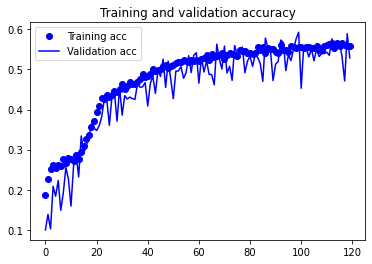

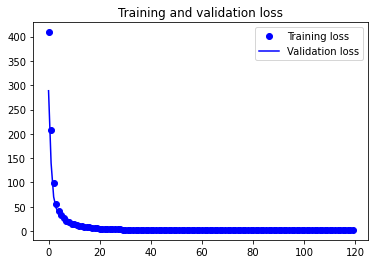

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:
##base 1
#version 3.1.4adam (l1 nobatch norm)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l1'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l1'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l1'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l1'))


model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 dropout_163 (Dropout)       (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_141 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_144 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_142 (MaxPooli  (None, 36, 36, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_164 (Dropout)       (None, 36, 36, 64)      

In [102]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 212s 1s/step - loss: 333.0505 - acc: 0.1099 - val_loss: 157.6181 - val_acc: 0.1090
Epoch 2/120
150/150 [==============================] - 201s 1s/step - loss: 67.5069 - acc: 0.0997 - val_loss: 18.3710 - val_acc: 0.1000
Epoch 3/120
150/150 [==============================] - 195s 1s/step - loss: 11.3890 - acc: 0.0964 - val_loss: 6.3128 - val_acc: 0.1000
Epoch 4/120
150/150 [==============================] - 192s 1s/step - loss: 4.3716 - acc: 0.0968 - val_loss: 3.3727 - val_acc: 0.1000
Epoch 5/120
150/150 [==============================] - 191s 1s/step - loss: 3.0494 - acc: 0.0908 - val_loss: 2.8093 - val_acc: 0.1000
Epoch 6/120
150/150 [==============================] - 201s 1s/step - loss: 2.7330 - acc: 0.0975 - val_loss: 2.7098 - val_acc: 0.1000
Epoch 7/120
150/150 [==============================] - 205s 1s/step - loss: 2.7094 - acc: 0.0949 - val_loss: 2.7094 - val_acc: 0.1000
Epoch 8/120
150/150 [==============================] - 

Epoch 62/120
150/150 [==============================] - 191s 1s/step - loss: 2.7084 - acc: 0.0999 - val_loss: 2.7082 - val_acc: 0.1000
Epoch 63/120
150/150 [==============================] - 187s 1s/step - loss: 2.7084 - acc: 0.0999 - val_loss: 2.7085 - val_acc: 0.1000
Epoch 64/120
150/150 [==============================] - 190s 1s/step - loss: 2.7084 - acc: 0.0967 - val_loss: 2.7081 - val_acc: 0.1000
Epoch 65/120
150/150 [==============================] - 191s 1s/step - loss: 2.7085 - acc: 0.0941 - val_loss: 2.7085 - val_acc: 0.1000
Epoch 66/120
150/150 [==============================] - 191s 1s/step - loss: 2.7084 - acc: 0.1056 - val_loss: 2.7082 - val_acc: 0.1000
Epoch 67/120
150/150 [==============================] - 191s 1s/step - loss: 2.7084 - acc: 0.0939 - val_loss: 2.7088 - val_acc: 0.1000
Epoch 68/120
150/150 [==============================] - 191s 1s/step - loss: 2.7084 - acc: 0.1013 - val_loss: 2.7081 - val_acc: 0.1000
Epoch 69/120
150/150 [==============================] -

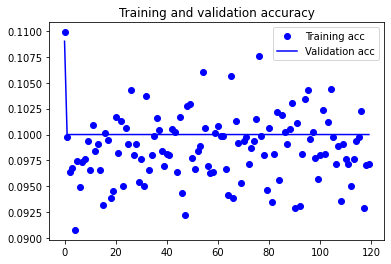

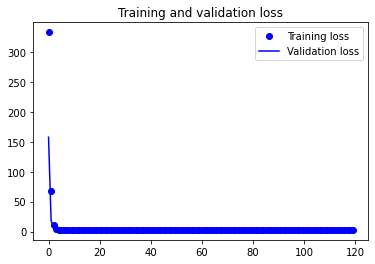

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 5s 446ms/step - loss: 2.7079 - acc: 0.1000
test acc: 0.10000000149011612


In [21]:
#l1 l2 without batch norm3.1.5
from tensorflow.keras.layers import Dropout

from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))


model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_20 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 36, 36, 64)       

In [22]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 219s 1s/step - loss: 39.2123 - acc: 0.1119 - val_loss: 22.8286 - val_acc: 0.1410
Epoch 2/120
150/150 [==============================] - 220s 1s/step - loss: 13.1502 - acc: 0.1493 - val_loss: 6.8062 - val_acc: 0.1745
Epoch 3/120
150/150 [==============================] - 221s 1s/step - loss: 5.1005 - acc: 0.1633 - val_loss: 4.0444 - val_acc: 0.1760
Epoch 4/120
150/150 [==============================] - 219s 1s/step - loss: 3.5224 - acc: 0.1707 - val_loss: 3.1453 - val_acc: 0.1970
Epoch 5/120
150/150 [==============================] - 219s 1s/step - loss: 2.9430 - acc: 0.1656 - val_loss: 2.7700 - val_acc: 0.1920
Epoch 6/120
150/150 [==============================] - 220s 1s/step - loss: 2.6833 - acc: 0.1708 - val_loss: 2.5907 - val_acc: 0.2110
Epoch 7/120
150/150 [==============================] - 220s 1s/step - loss: 2.5439 - acc: 0.1783 - val_loss: 2.4990 - val_acc: 0.2120
Epoch 8/120
150/150 [==============================] - 207s

Epoch 62/120
150/150 [==============================] - 205s 1s/step - loss: 2.2530 - acc: 0.2080 - val_loss: 2.2392 - val_acc: 0.2305
Epoch 63/120
150/150 [==============================] - 206s 1s/step - loss: 2.2483 - acc: 0.2135 - val_loss: 2.2311 - val_acc: 0.2345
Epoch 64/120
150/150 [==============================] - 207s 1s/step - loss: 2.2525 - acc: 0.2129 - val_loss: 2.2303 - val_acc: 0.2515
Epoch 65/120
150/150 [==============================] - 206s 1s/step - loss: 2.2473 - acc: 0.2187 - val_loss: 2.2414 - val_acc: 0.2280
Epoch 66/120
150/150 [==============================] - 203s 1s/step - loss: 2.2515 - acc: 0.2129 - val_loss: 2.2337 - val_acc: 0.2285
Epoch 67/120
150/150 [==============================] - 207s 1s/step - loss: 2.2498 - acc: 0.2133 - val_loss: 2.2426 - val_acc: 0.2210
Epoch 68/120
150/150 [==============================] - 207s 1s/step - loss: 2.2491 - acc: 0.2097 - val_loss: 2.2250 - val_acc: 0.2470
Epoch 69/120
150/150 [==============================] -

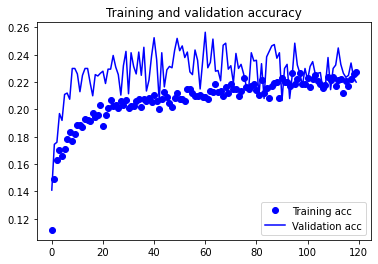

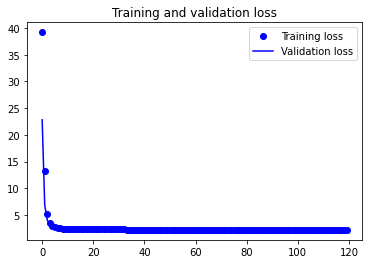

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 5s 541ms/step - loss: 2.2312 - acc: 0.2480
test acc: 0.24799999594688416


In [15]:
#base 1
#3.1.6
#l1 r2  with  batch norm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 dropout_10 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)      

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

![epoch4.png](attachment:epoch4.png)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

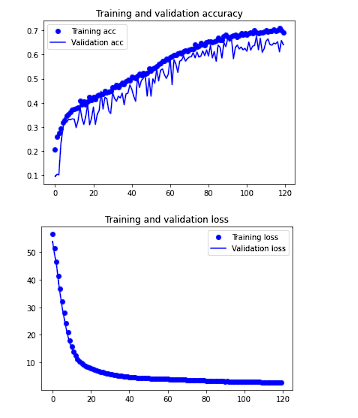

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

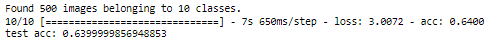

As can be observed from above : if batchnorm itself its best , try l1  : if batchnorm _l2 is best move on : if l2 itself its best remove batch norm from further and move on : make comparisons 

next we will test kernal initializer he normal

In [107]:
#base 1
#version 3.1.7adam+henorm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),kernel_initializer=keras.initializers.HeNormal(), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3),kernel_initializer=keras.initializers.HeNormal(),activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3),kernel_initializer =keras.initializers.HeNormal(), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3),kernel_initializer =keras.initializers.HeNormal(), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_149 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 dropout_168 (Dropout)       (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_123 (Ba  (None, 74, 74, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_150 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 36, 36, 64)     

In [108]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 224s 1s/step - loss: 18.6149 - acc: 0.1985 - val_loss: 18.0647 - val_acc: 0.1320
Epoch 2/120
150/150 [==============================] - 205s 1s/step - loss: 17.5608 - acc: 0.2496 - val_loss: 17.3493 - val_acc: 0.1805
Epoch 3/120
150/150 [==============================] - 209s 1s/step - loss: 16.6944 - acc: 0.2736 - val_loss: 16.1450 - val_acc: 0.2205
Epoch 4/120
150/150 [==============================] - 209s 1s/step - loss: 15.8580 - acc: 0.2957 - val_loss: 15.2468 - val_acc: 0.2625
Epoch 5/120
150/150 [==============================] - 212s 1s/step - loss: 15.0427 - acc: 0.3084 - val_loss: 14.3870 - val_acc: 0.3435
Epoch 6/120
150/150 [==============================] - 256s 2s/step - loss: 14.2716 - acc: 0.3133 - val_loss: 13.7439 - val_acc: 0.3085
Epoch 7/120
150/150 [==============================] - 314s 2s/step - loss: 13.4848 - acc: 0.3347 - val_loss: 13.0979 - val_acc: 0.3325
Epoch 8/120
150/150 [===========================

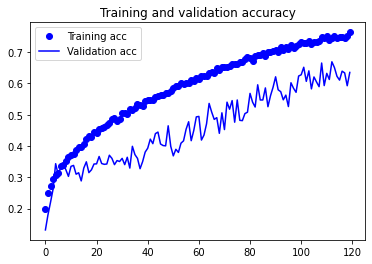

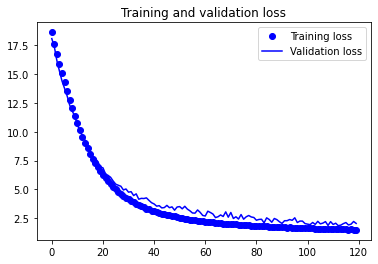

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [110]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 203ms/step - loss: 2.1337 - acc: 0.6300
test acc: 0.6299999952316284


next we will test striding isntead of pooling

In [ ]:
#base1ver3.1.8
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),kernel_initializer=keras.initializers.HeNormal(), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3),strides=(2, 2),kernel_initializer=keras.initializers.HeNormal(),activation='relu', kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3),kernel_initializer =keras.initializers.HeNormal(), activation='relu',kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3),strides=(2, 2),kernel_initializer =keras.initializers.HeNormal(), activation='relu', kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

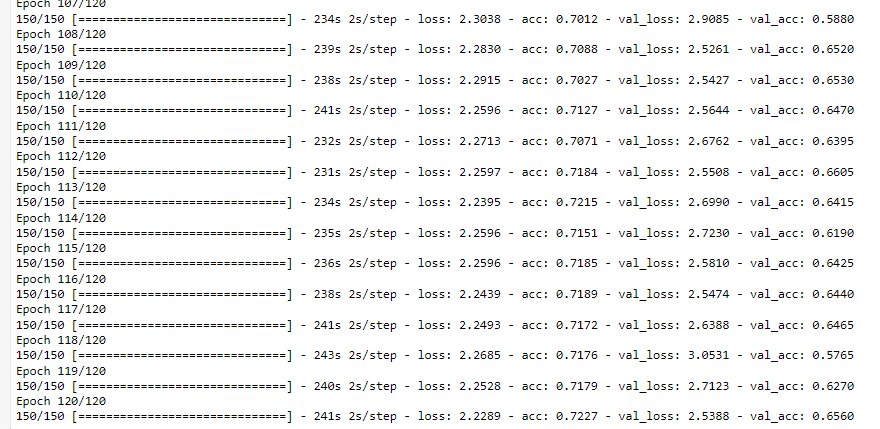

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

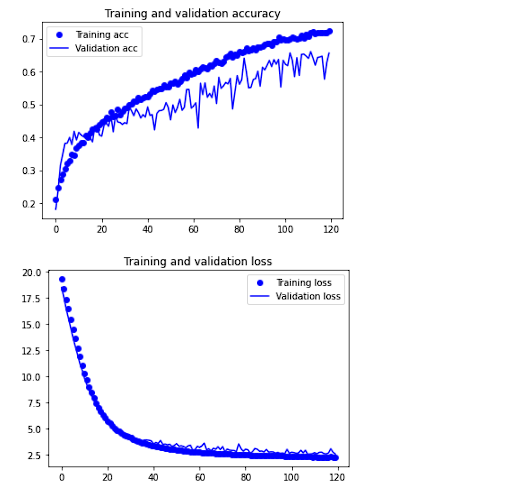

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

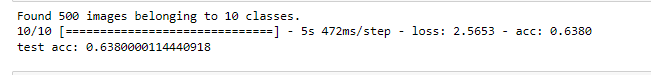

Next we try addition of padding

In [111]:
#base1ver3.1.9
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding="same",kernel_initializer=keras.initializers.HeNormal(), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3),strides=(2, 2),padding="same",kernel_initializer=keras.initializers.HeNormal(),activation='relu', kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3),padding="same",kernel_initializer =keras.initializers.HeNormal(), activation='relu',kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3),strides=(2, 2),padding="same",kernel_initializer =keras.initializers.HeNormal(), activation='relu', kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_153 (Conv2D)         (None, 150, 150, 32)      896       
                                                                 
 dropout_173 (Dropout)       (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 75, 75, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_128 (Ba  (None, 75, 75, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_154 (Conv2D)         (None, 38, 38, 64)        18496     
                                                                 
 batch_normalization_129 (Ba  (None, 38, 38, 64)     

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

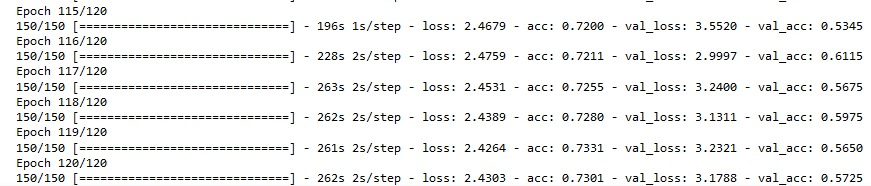

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

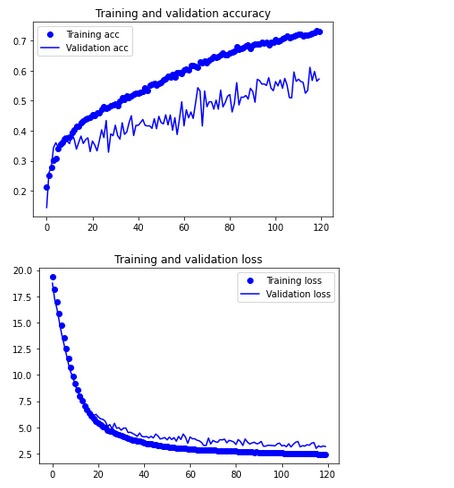

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

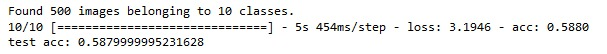

From the above tests I concluded that the best performing model is base 1 version 3.1 , it had best test score as well as highest accuracy at the last epoch of 78, i will now do learning rate experiments. it will now be refered as base

In [124]:
#base 1 200 epoch adam
#version 3.1adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_189 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 dropout_213 (Dropout)       (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_180 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_168 (Ba  (None, 74, 74, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_190 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_181 (MaxPooli  (None, 36, 36, 64)     

In [125]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=200,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/200
150/150 [==============================] - 357s 2s/step - loss: 14.8428 - acc: 0.1996 - val_loss: 14.1610 - val_acc: 0.1450
Epoch 2/200
150/150 [==============================] - 353s 2s/step - loss: 13.9328 - acc: 0.2435 - val_loss: 13.5318 - val_acc: 0.1365
Epoch 3/200
150/150 [==============================] - 350s 2s/step - loss: 13.1843 - acc: 0.2671 - val_loss: 12.7879 - val_acc: 0.1700
Epoch 4/200
150/150 [==============================] - 352s 2s/step - loss: 12.4454 - acc: 0.2837 - val_loss: 12.1374 - val_acc: 0.2575
Epoch 5/200
150/150 [==============================] - 343s 2s/step - loss: 11.7561 - acc: 0.3067 - val_loss: 11.4190 - val_acc: 0.3020
Epoch 6/200
150/150 [==============================] - 339s 2s/step - loss: 11.0893 - acc: 0.3112 - val_loss: 10.8850 - val_acc: 0.3080
Epoch 7/200
150/150 [==============================] - 363s 2s/step - loss: 10.4326 - acc: 0.3329 - val_loss: 10.2294 - val_acc: 0.3060
Epoch 8/200
150/150 [===========================

150/150 [==============================] - 225s 1s/step - loss: 1.3596 - acc: 0.7664 - val_loss: 1.6604 - val_acc: 0.6920
Epoch 122/200
150/150 [==============================] - 221s 1s/step - loss: 1.3407 - acc: 0.7763 - val_loss: 1.5354 - val_acc: 0.7260
Epoch 123/200
150/150 [==============================] - 226s 2s/step - loss: 1.3526 - acc: 0.7719 - val_loss: 1.6962 - val_acc: 0.6850
Epoch 124/200
150/150 [==============================] - 179s 1s/step - loss: 1.3243 - acc: 0.7816 - val_loss: 1.6557 - val_acc: 0.6960
Epoch 125/200
150/150 [==============================] - 185s 1s/step - loss: 1.3304 - acc: 0.7800 - val_loss: 1.6498 - val_acc: 0.6950
Epoch 126/200
150/150 [==============================] - 199s 1s/step - loss: 1.3424 - acc: 0.7712 - val_loss: 1.9212 - val_acc: 0.6240
Epoch 127/200
150/150 [==============================] - 200s 1s/step - loss: 1.3315 - acc: 0.7808 - val_loss: 1.6551 - val_acc: 0.6950
Epoch 128/200
150/150 [==============================] - 199s 

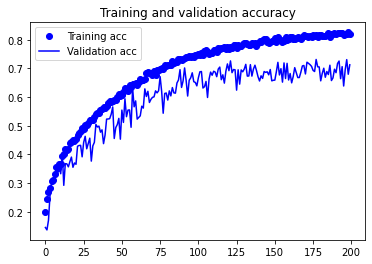

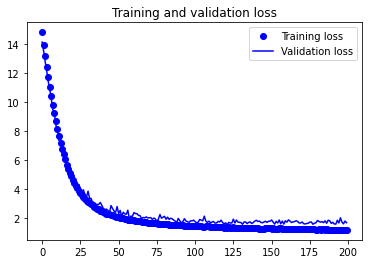

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [130]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 10s 990ms/step - loss: 1.7741 - acc: 0.6660
test acc: 0.6660000085830688


In [131]:
model.save('base1ver3.1.h5')

In [8]:
#base 1
#version 4.1 chagne lr+
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00017),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0

In [9]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 130s 851ms/step - loss: 14.5496 - acc: 0.2108 - val_loss: 15.3452 - val_acc: 0.1000
Epoch 2/120
150/150 [==============================] - 125s 832ms/step - loss: 13.1770 - acc: 0.2589 - val_loss: 13.5815 - val_acc: 0.1005
Epoch 3/120
150/150 [==============================] - 128s 850ms/step - loss: 11.9449 - acc: 0.2913 - val_loss: 11.7667 - val_acc: 0.1460
Epoch 4/120
150/150 [==============================] - 218s 1s/step - loss: 10.7763 - acc: 0.3087 - val_loss: 10.1096 - val_acc: 0.2965
Epoch 5/120
150/150 [==============================] - 222s 1s/step - loss: 9.6791 - acc: 0.3324 - val_loss: 8.9016 - val_acc: 0.3675
Epoch 6/120
150/150 [==============================] - 319s 2s/step - loss: 8.7121 - acc: 0.3328 - val_loss: 7.9581 - val_acc: 0.3875
Epoch 7/120
150/150 [==============================] - 388s 3s/step - loss: 7.7941 - acc: 0.3523 - val_loss: 7.2586 - val_acc: 0.3730
Epoch 8/120
150/150 [========================

150/150 [==============================] - 400s 3s/step - loss: 1.6128 - acc: 0.7236 - val_loss: 1.8483 - val_acc: 0.6665
Epoch 62/120
150/150 [==============================] - 399s 3s/step - loss: 1.6147 - acc: 0.7204 - val_loss: 2.0448 - val_acc: 0.6195
Epoch 63/120
150/150 [==============================] - 407s 3s/step - loss: 1.6083 - acc: 0.7241 - val_loss: 1.8922 - val_acc: 0.6550
Epoch 64/120
150/150 [==============================] - 406s 3s/step - loss: 1.6052 - acc: 0.7237 - val_loss: 1.9239 - val_acc: 0.6360
Epoch 65/120
150/150 [==============================] - 401s 3s/step - loss: 1.5825 - acc: 0.7375 - val_loss: 1.8756 - val_acc: 0.6535
Epoch 66/120
150/150 [==============================] - 408s 3s/step - loss: 1.6002 - acc: 0.7296 - val_loss: 1.7762 - val_acc: 0.6825
Epoch 67/120
150/150 [==============================] - 402s 3s/step - loss: 1.5826 - acc: 0.7356 - val_loss: 1.7166 - val_acc: 0.6945
Epoch 68/120
150/150 [==============================] - 399s 3s/step

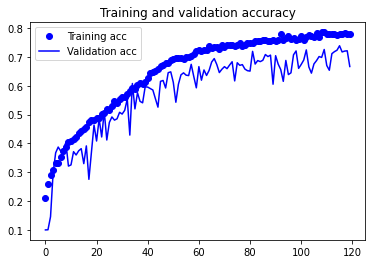

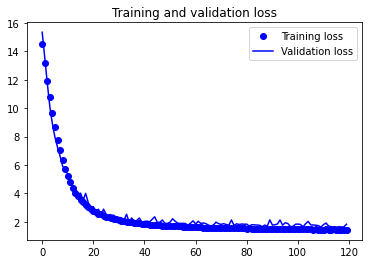

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 10s 987ms/step - loss: 1.8638 - acc: 0.6640
test acc: 0.6639999747276306


In [12]:
model.save('base1ver4.1.h5')

In [25]:
#base 1
#version 4.2hagne lr++
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_25 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)      

In [26]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 133s 875ms/step - loss: 14.5121 - acc: 0.2184 - val_loss: 13.8177 - val_acc: 0.1000
Epoch 2/120
150/150 [==============================] - 129s 861ms/step - loss: 12.8768 - acc: 0.2691 - val_loss: 13.4502 - val_acc: 0.1000
Epoch 3/120
150/150 [==============================] - 130s 862ms/step - loss: 11.4566 - acc: 0.2968 - val_loss: 11.2187 - val_acc: 0.1575
Epoch 4/120
150/150 [==============================] - 129s 860ms/step - loss: 10.0758 - acc: 0.3253 - val_loss: 9.4816 - val_acc: 0.2770
Epoch 5/120
150/150 [==============================] - 132s 876ms/step - loss: 8.9438 - acc: 0.3405 - val_loss: 8.3795 - val_acc: 0.3270
Epoch 6/120
150/150 [==============================] - 131s 871ms/step - loss: 7.9014 - acc: 0.3509 - val_loss: 7.3693 - val_acc: 0.3640
Epoch 7/120
150/150 [==============================] - 130s 868ms/step - loss: 6.9677 - acc: 0.3856 - val_loss: 6.5203 - val_acc: 0.3825
Epoch 8/120
150/150 [=============

150/150 [==============================] - 230s 2s/step - loss: 1.6652 - acc: 0.7287 - val_loss: 1.9750 - val_acc: 0.6345
Epoch 62/120
150/150 [==============================] - 224s 1s/step - loss: 1.6579 - acc: 0.7211 - val_loss: 1.7557 - val_acc: 0.7005
Epoch 63/120
150/150 [==============================] - 227s 2s/step - loss: 1.6287 - acc: 0.7355 - val_loss: 1.8051 - val_acc: 0.6730
Epoch 64/120
150/150 [==============================] - 226s 2s/step - loss: 1.6343 - acc: 0.7341 - val_loss: 1.8645 - val_acc: 0.6775
Epoch 65/120
150/150 [==============================] - 230s 2s/step - loss: 1.6146 - acc: 0.7371 - val_loss: 1.7601 - val_acc: 0.7015
Epoch 66/120
150/150 [==============================] - 227s 2s/step - loss: 1.6344 - acc: 0.7360 - val_loss: 1.7670 - val_acc: 0.7070
Epoch 67/120
150/150 [==============================] - 225s 1s/step - loss: 1.6175 - acc: 0.7428 - val_loss: 1.7648 - val_acc: 0.6975
Epoch 68/120
150/150 [==============================] - 230s 2s/step

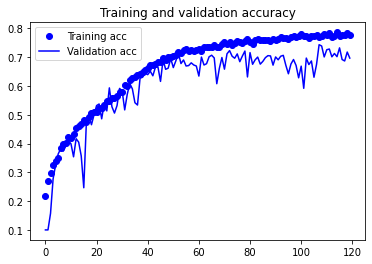

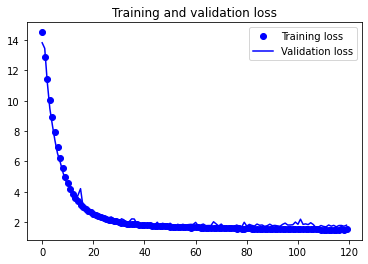

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 4s 423ms/step - loss: 1.8496 - acc: 0.6760
test acc: 0.6759999990463257


In [ ]:
model.save('base1ver4.2.h5')

In [16]:
#base 1
#version 4.3 change lr -
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00003),
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_15 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)      

In [17]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/120
150/150 [==============================] - 427s 3s/step - loss: 14.8902 - acc: 0.1952 - val_loss: 14.4216 - val_acc: 0.1230
Epoch 2/120
150/150 [==============================] - 432s 3s/step - loss: 14.1600 - acc: 0.2391 - val_loss: 13.9368 - val_acc: 0.1635
Epoch 3/120
150/150 [==============================] - 421s 3s/step - loss: 13.5122 - acc: 0.2653 - val_loss: 13.1456 - val_acc: 0.2115
Epoch 4/120
150/150 [==============================] - 458s 3s/step - loss: 12.9312 - acc: 0.2877 - val_loss: 12.5493 - val_acc: 0.2335
Epoch 5/120
150/150 [==============================] - 428s 3s/step - loss: 12.3793 - acc: 0.3000 - val_loss: 11.9963 - val_acc: 0.2665
Epoch 6/120
150/150 [==============================] - 447s 3s/step - loss: 11.8568 - acc: 0.3057 - val_loss: 11.5371 - val_acc: 0.2990
Epoch 7/120
150/150 [==============================] - 466s 3s/step - loss: 11.3081 - acc: 0.3269 - val_loss: 10.9404 - val_acc: 0.3120
Epoch 8/120
150/150 [===========================

150/150 [==============================] - 412s 3s/step - loss: 2.1296 - acc: 0.6007 - val_loss: 2.5460 - val_acc: 0.5015
Epoch 62/120
150/150 [==============================] - 404s 3s/step - loss: 2.1034 - acc: 0.5971 - val_loss: 2.4610 - val_acc: 0.5245
Epoch 63/120
150/150 [==============================] - 406s 3s/step - loss: 2.0795 - acc: 0.6116 - val_loss: 2.5303 - val_acc: 0.4955
Epoch 64/120
150/150 [==============================] - 412s 3s/step - loss: 2.0798 - acc: 0.6077 - val_loss: 2.3663 - val_acc: 0.5255
Epoch 65/120
150/150 [==============================] - 401s 3s/step - loss: 2.0260 - acc: 0.6211 - val_loss: 2.4798 - val_acc: 0.5010
Epoch 66/120
150/150 [==============================] - 403s 3s/step - loss: 2.0032 - acc: 0.6225 - val_loss: 2.3999 - val_acc: 0.5115
Epoch 67/120
150/150 [==============================] - 419s 3s/step - loss: 1.9824 - acc: 0.6280 - val_loss: 2.3279 - val_acc: 0.5365
Epoch 68/120
150/150 [==============================] - 400s 3s/step

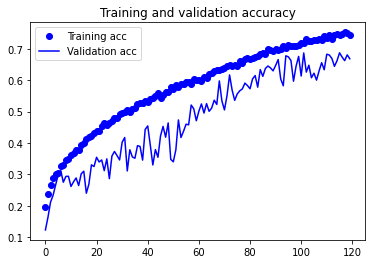

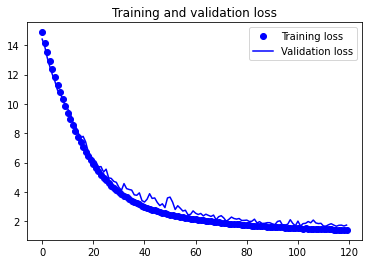

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 3s 289ms/step - loss: 1.8646 - acc: 0.6460
test acc: 0.6460000276565552


In [20]:
model.save('base1ver4.3.h5')

# Development of new base models


In [29]:
#base 2
#version1 simpler layers
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
history = model.fit(
      train_generatoraug,
      steps_per_epoch=150,
      epochs=130,
      validation_data=validation_generator,
      validation_steps=40)

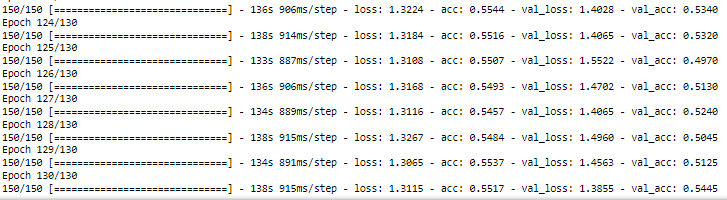

In [ ]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

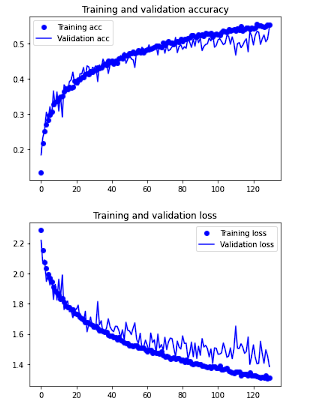

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

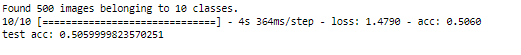

In [ ]:
#base 3 readjusted column simpler
#version 1
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer='l2'))

model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

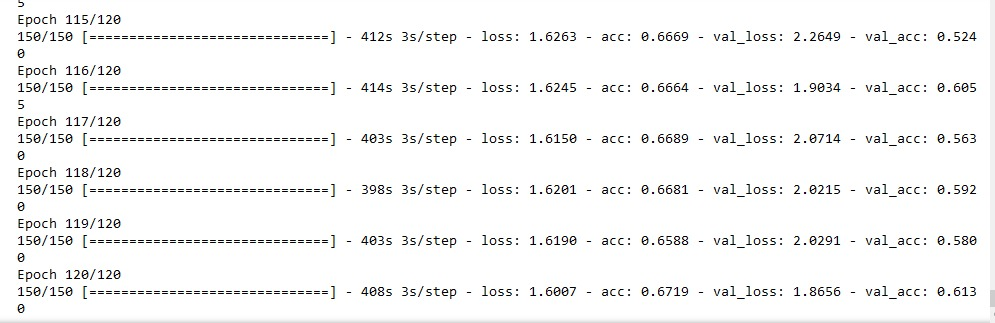

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

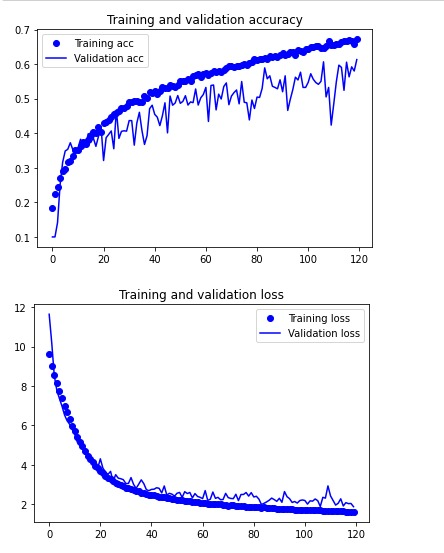

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

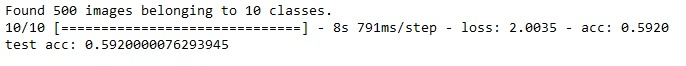

In [ ]:
#base 4 readjusted column #addition of 1 256 layer inoput changed to 64
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=200,
      validation_data=validation_generator,
      validation_steps=40)

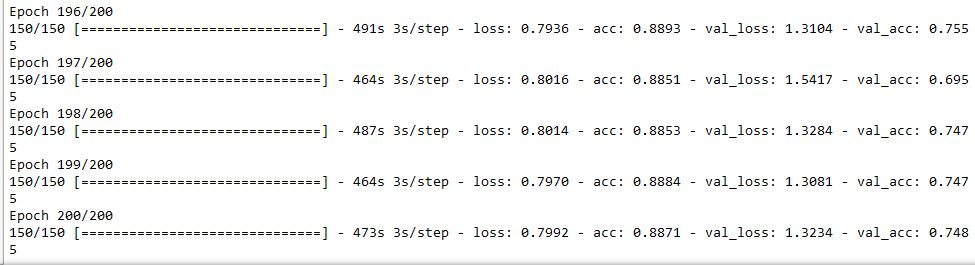

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

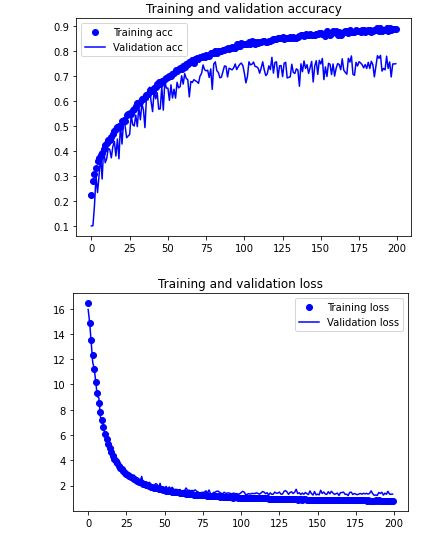

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

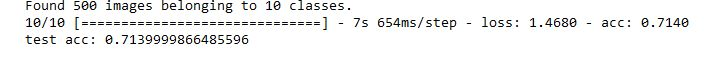

In [ ]:
#base 4 readjusted column #addition of 1 256 layer inoput changed to 64
#version 2 different epoch
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=120,
      validation_data=validation_generator,
      validation_steps=40)

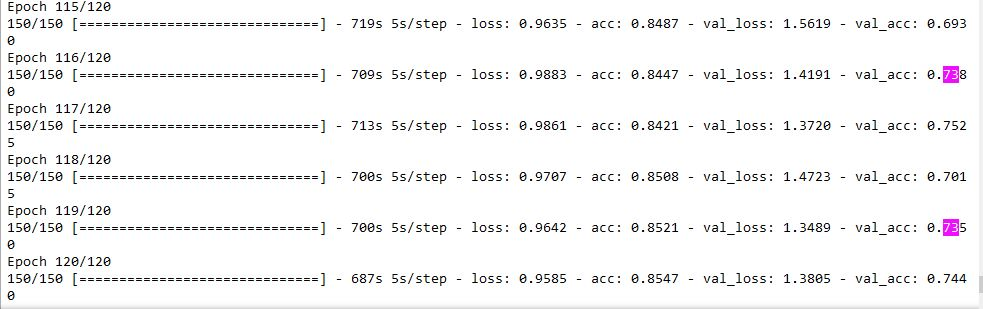

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

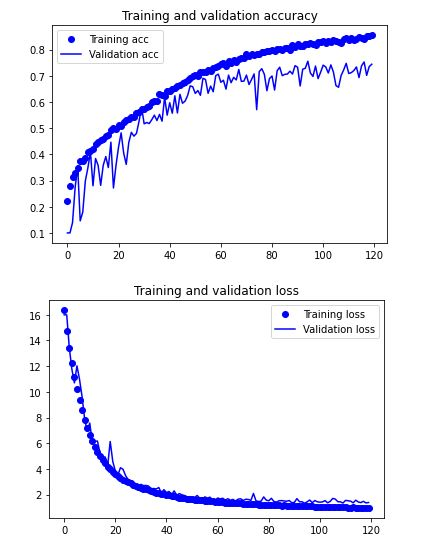

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

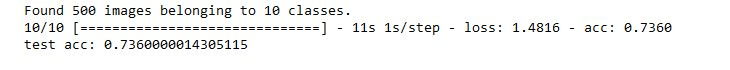

In [ ]:
#base4 tried l1 l2
#ver3
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00018),
              metrics=['acc'])

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=150,
      validation_data=validation_generator,
      validation_steps=40)

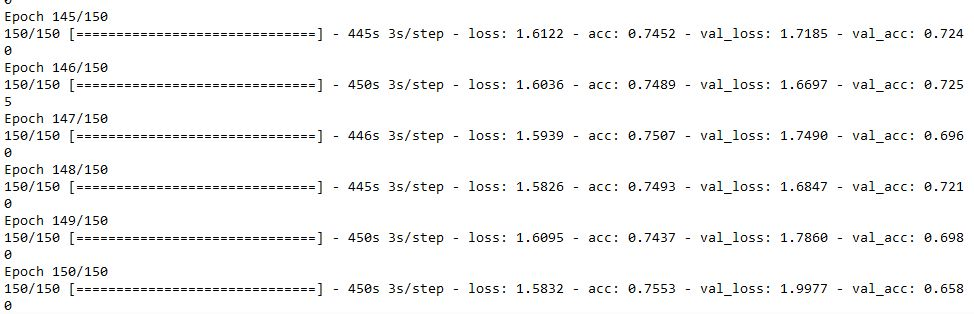

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

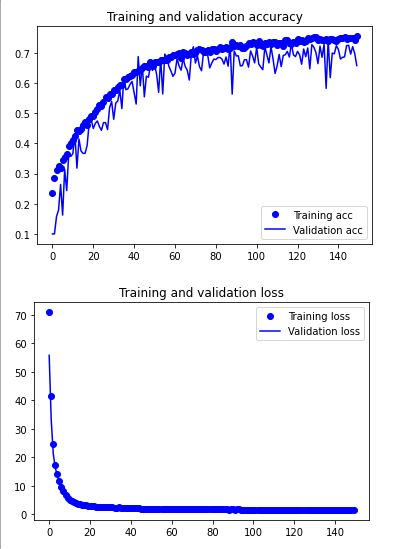

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

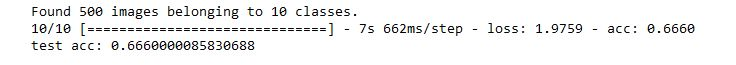

In [ ]:
#base 4 readjusted column #addition of 1 256 layer inoput changed to 64
#version 4 increase lr to 0.0002
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['acc'])

In [ ]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=140,
      validation_data=validation_generator,
      validation_steps=40)

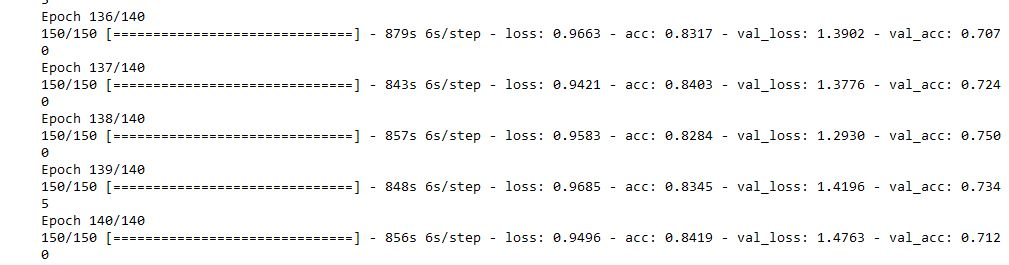

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

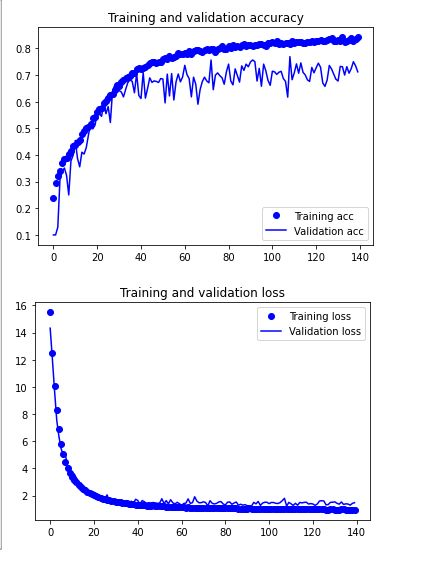

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

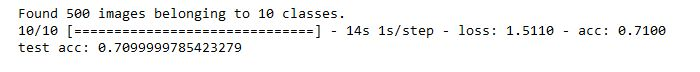

In [43]:
#base 1
#version 4.2hagne lr++
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['acc'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_50 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_45 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 36, 36, 64)     

In [44]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=200,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/200
150/150 [==============================] - 137s 901ms/step - loss: 14.4471 - acc: 0.2208 - val_loss: 14.3393 - val_acc: 0.1005
Epoch 2/200
150/150 [==============================] - 135s 901ms/step - loss: 12.8514 - acc: 0.2683 - val_loss: 12.6898 - val_acc: 0.1770
Epoch 3/200
150/150 [==============================] - 134s 893ms/step - loss: 11.4142 - acc: 0.2924 - val_loss: 11.6169 - val_acc: 0.1255
Epoch 4/200
150/150 [==============================] - 128s 853ms/step - loss: 10.0704 - acc: 0.3140 - val_loss: 9.4131 - val_acc: 0.2675
Epoch 5/200
150/150 [==============================] - 128s 852ms/step - loss: 8.8909 - acc: 0.3411 - val_loss: 8.2295 - val_acc: 0.3460
Epoch 6/200
150/150 [==============================] - 128s 852ms/step - loss: 7.8037 - acc: 0.3532 - val_loss: 7.4653 - val_acc: 0.3005
Epoch 7/200
150/150 [==============================] - 128s 851ms/step - loss: 6.9112 - acc: 0.3600 - val_loss: 6.4216 - val_acc: 0.3705
Epoch 8/200
150/150 [=============

Epoch 61/200
150/150 [==============================] - 156s 1s/step - loss: 1.6278 - acc: 0.7263 - val_loss: 1.9453 - val_acc: 0.6310
Epoch 62/200
150/150 [==============================] - 153s 1s/step - loss: 1.6066 - acc: 0.7324 - val_loss: 1.8063 - val_acc: 0.6750
Epoch 63/200
150/150 [==============================] - 155s 1s/step - loss: 1.6206 - acc: 0.7313 - val_loss: 1.9144 - val_acc: 0.6290
Epoch 64/200
150/150 [==============================] - 155s 1s/step - loss: 1.6073 - acc: 0.7315 - val_loss: 1.8925 - val_acc: 0.6435
Epoch 65/200
150/150 [==============================] - 151s 1s/step - loss: 1.6202 - acc: 0.7308 - val_loss: 1.7964 - val_acc: 0.6735
Epoch 66/200
150/150 [==============================] - 139s 922ms/step - loss: 1.6147 - acc: 0.7355 - val_loss: 1.8199 - val_acc: 0.6845
Epoch 67/200
150/150 [==============================] - 145s 962ms/step - loss: 1.6160 - acc: 0.7337 - val_loss: 1.8289 - val_acc: 0.6515
Epoch 68/200
150/150 [===========================

150/150 [==============================] - 130s 865ms/step - loss: 1.4664 - acc: 0.7911 - val_loss: 1.5939 - val_acc: 0.7585
Epoch 121/200
150/150 [==============================] - 129s 861ms/step - loss: 1.4896 - acc: 0.7832 - val_loss: 1.8288 - val_acc: 0.6795
Epoch 122/200
150/150 [==============================] - 129s 861ms/step - loss: 1.4945 - acc: 0.7813 - val_loss: 1.6727 - val_acc: 0.7445
Epoch 123/200
150/150 [==============================] - 129s 861ms/step - loss: 1.4825 - acc: 0.7869 - val_loss: 1.6049 - val_acc: 0.7615
Epoch 124/200
150/150 [==============================] - 130s 864ms/step - loss: 1.5051 - acc: 0.7833 - val_loss: 1.7875 - val_acc: 0.7025
Epoch 125/200
150/150 [==============================] - 130s 863ms/step - loss: 1.4970 - acc: 0.7751 - val_loss: 1.8190 - val_acc: 0.6965
Epoch 126/200
150/150 [==============================] - 130s 864ms/step - loss: 1.4837 - acc: 0.7879 - val_loss: 1.7790 - val_acc: 0.7015
Epoch 127/200
150/150 [==================

150/150 [==============================] - 141s 935ms/step - loss: 1.4427 - acc: 0.7967 - val_loss: 1.7195 - val_acc: 0.7300
Epoch 180/200
150/150 [==============================] - 141s 939ms/step - loss: 1.4399 - acc: 0.8055 - val_loss: 1.6729 - val_acc: 0.7395
Epoch 181/200
150/150 [==============================] - 142s 945ms/step - loss: 1.4353 - acc: 0.7957 - val_loss: 1.6680 - val_acc: 0.7305
Epoch 182/200
150/150 [==============================] - 147s 977ms/step - loss: 1.4185 - acc: 0.8036 - val_loss: 1.6016 - val_acc: 0.7480
Epoch 183/200
150/150 [==============================] - 147s 980ms/step - loss: 1.4174 - acc: 0.8037 - val_loss: 1.6261 - val_acc: 0.7575
Epoch 184/200
150/150 [==============================] - 140s 930ms/step - loss: 1.4336 - acc: 0.8016 - val_loss: 1.6504 - val_acc: 0.7425
Epoch 185/200
150/150 [==============================] - 137s 912ms/step - loss: 1.4432 - acc: 0.7975 - val_loss: 1.8390 - val_acc: 0.6955
Epoch 186/200
150/150 [==================

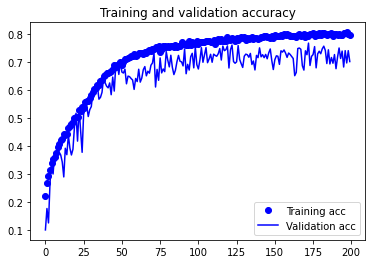

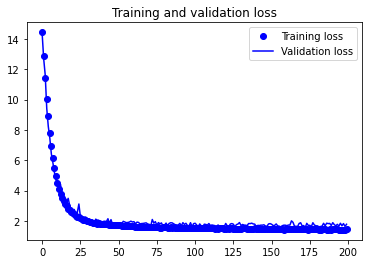

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
model.save('candidate1.h5')

In [47]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 3s 267ms/step - loss: 1.9191 - acc: 0.6600
test acc: 0.6600000262260437


In [52]:
#base 1
#version 4.2hagne lr++
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['acc'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 dropout_65 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_60 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 36, 36, 64)     

In [53]:
history = model.fit(
    #traingenerator changed to traingeneratoraug when the data is augmented
      train_generatoraug,
      steps_per_epoch=150,
    #epoch changed from 70 to 100
      epochs=123,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/123
150/150 [==============================] - 244s 2s/step - loss: 14.5631 - acc: 0.2003 - val_loss: 13.5275 - val_acc: 0.1000
Epoch 2/123
150/150 [==============================] - 259s 2s/step - loss: 12.9403 - acc: 0.2515 - val_loss: 12.4768 - val_acc: 0.1545
Epoch 3/123
150/150 [==============================] - 260s 2s/step - loss: 11.4408 - acc: 0.2928 - val_loss: 10.7973 - val_acc: 0.2390
Epoch 4/123
150/150 [==============================] - 259s 2s/step - loss: 10.0900 - acc: 0.2981 - val_loss: 9.5398 - val_acc: 0.2610
Epoch 5/123
150/150 [==============================] - 258s 2s/step - loss: 8.8796 - acc: 0.3349 - val_loss: 8.2138 - val_acc: 0.3250
Epoch 6/123
150/150 [==============================] - 261s 2s/step - loss: 7.8110 - acc: 0.3543 - val_loss: 7.2633 - val_acc: 0.3485
Epoch 7/123
150/150 [==============================] - 221s 1s/step - loss: 6.8885 - acc: 0.3757 - val_loss: 6.4850 - val_acc: 0.3645
Epoch 8/123
150/150 [==============================] - 

Epoch 62/123
150/150 [==============================] - 219s 1s/step - loss: 1.6119 - acc: 0.7340 - val_loss: 1.9830 - val_acc: 0.6270
Epoch 63/123
150/150 [==============================] - 218s 1s/step - loss: 1.6148 - acc: 0.7312 - val_loss: 1.8777 - val_acc: 0.6640
Epoch 64/123
150/150 [==============================] - 217s 1s/step - loss: 1.6040 - acc: 0.7379 - val_loss: 1.8163 - val_acc: 0.6815
Epoch 65/123
150/150 [==============================] - 215s 1s/step - loss: 1.5746 - acc: 0.7517 - val_loss: 1.8254 - val_acc: 0.6585
Epoch 66/123
150/150 [==============================] - 219s 1s/step - loss: 1.5760 - acc: 0.7475 - val_loss: 1.7960 - val_acc: 0.6875
Epoch 67/123
150/150 [==============================] - 218s 1s/step - loss: 1.5732 - acc: 0.7505 - val_loss: 1.9042 - val_acc: 0.6495
Epoch 68/123
150/150 [==============================] - 216s 1s/step - loss: 1.5633 - acc: 0.7541 - val_loss: 1.8123 - val_acc: 0.6790
Epoch 69/123
150/150 [==============================] -

150/150 [==============================] - 130s 862ms/step - loss: 1.4863 - acc: 0.7848 - val_loss: 1.6757 - val_acc: 0.7340
Epoch 123/123
150/150 [==============================] - 130s 862ms/step - loss: 1.4821 - acc: 0.7831 - val_loss: 1.7664 - val_acc: 0.6990


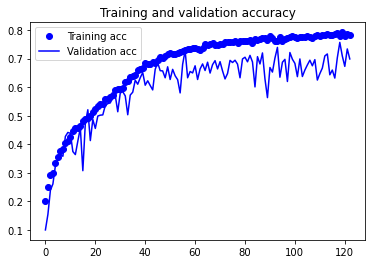

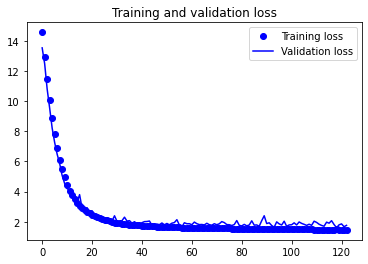

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
model.save('candidate1.2.h5')

In [56]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 196ms/step - loss: 1.8216 - acc: 0.6820
test acc: 0.6819999814033508


### Model #2

In [65]:
from tensorflow.keras.applications import InceptionV3
img_size =150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                        
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
                        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])
model.summary()
conv_base.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_19 (Flatten)        (None, 18432)             0         
                                                                 
 dense_38 (Dense)            (None, 256)               4718848   
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 26,489,770
Non-trainable params: 34,432
_________________________________________________________________
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape   

 conv2d_173 (Conv2D)            (None, 16, 16, 64)   76800       ['activation_100[0][0]']         
                                                                                                  
 conv2d_176 (Conv2D)            (None, 16, 16, 96)   82944       ['activation_103[0][0]']         
                                                                                                  
 conv2d_177 (Conv2D)            (None, 16, 16, 32)   6144        ['average_pooling2d_9[0][0]']    
                                                                                                  
 batch_normalization_179 (Batch  (None, 16, 16, 64)  192         ['conv2d_171[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_181 (Batch  (None, 16, 16, 64)  192         ['conv2d_173[0][0]']             
 Normaliza

 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_106[0][0]',         
                                                                  'activation_108[0][0]',         
                                                                  'activation_111[0][0]',         
                                                                  'activation_112[0][0]']         
                                                                                                  
 conv2d_188 (Conv2D)            (None, 16, 16, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_196 (Batch  (None, 16, 16, 64)  192         ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_203 (Batch  (None, 7, 7, 96)    288         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_120 (Activation)    (None, 7, 7, 384)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 activation_123 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_203[0][0]']
                                                                                                  
 max_pooling2d_70 (MaxPooling2D  (None, 7, 7, 288)   0           ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (C

 activation_132 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_212[0][0]']
                                                                                                  
 activation_133 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_213[0][0]']
                                                                                                  
 mixed4 (Concatenate)           (None, 7, 7, 768)    0           ['activation_124[0][0]',         
                                                                  'activation_127[0][0]',         
                                                                  'activation_132[0][0]',         
                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_210 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed4[0][0]']                 
          

                                                                  'activation_137[0][0]',         
                                                                  'activation_142[0][0]',         
                                                                  'activation_143[0][0]']         
                                                                                                  
 conv2d_220 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_228 (Batch  (None, 7, 7, 160)   480         ['conv2d_220[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_228[0][0]']
          

                                                                                                  
 batch_normalization_238 (Batch  (None, 7, 7, 192)   576         ['conv2d_230[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_158 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_238[0][0]']
                                                                                                  
 conv2d_231 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_158[0][0]']         
                                                                                                  
 batch_normalization_239 (Batch  (None, 7, 7, 192)   576         ['conv2d_231[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_239 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_166[0][0]']         
                                                                                                  
 batch_normalization_247 (Batch  (None, 7, 7, 192)   576         ['conv2d_239[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_167 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_247[0][0]']
                                                                                                  
 conv2d_236 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_24

 batch_normalization_256 (Batch  (None, 3, 3, 384)   1152        ['conv2d_248[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_257 (Batch  (None, 3, 3, 384)   1152        ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_250 (Conv2D)            (None, 3, 3, 192)    245760      ['average_pooling2d_16[0][0]']   
                                                                                                  
 batch_normalization_250 (Batch  (None, 3, 3, 320)   960         ['conv2d_242[0][0]']             
 Normalization)                                                                                   
          

 conv2d_259 (Conv2D)            (None, 3, 3, 192)    393216      ['average_pooling2d_17[0][0]']   
                                                                                                  
 batch_normalization_259 (Batch  (None, 3, 3, 320)   960         ['conv2d_251[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_181 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_261[0][0]']
                                                                                                  
 activation_182 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_262[0][0]']
                                                                                                  
 activation_185 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_265[0][0]']
          

In [66]:
for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
history = model.fit(
      train_generatoraug,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)

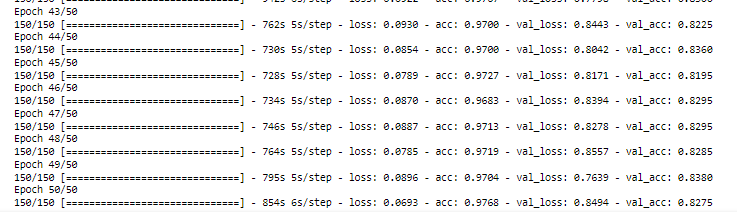

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

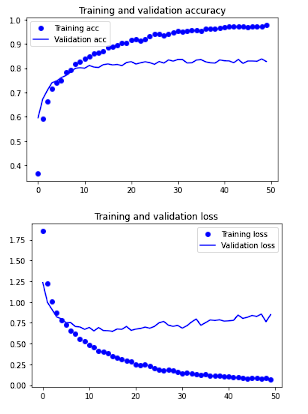

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

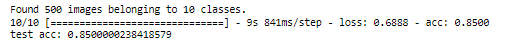

In [ ]:
model.save('baseptver1')

In [67]:
from tensorflow.keras.applications import ResNet50
img_size =150


conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
                        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])
model.summary()
conv_base.summary()
for layer in conv_base.layers:
    layer.trainable = False

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_20 (Flatten)        (None, 51200)             0         
                                                                 
 dense_40 (Dense)            (None, 256)               13107456  
                                                                 
 dense_41 (Dense)            (None, 10)                2570      
                                                                 
Total params: 36,697,738
Trainable params: 36,644,618
Non-trainable params: 53,120
_________________________________________________________________
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape       

 conv2_block2_out (Activation)  (None, 38, 38, 256)  0           ['conv2_block2_add[0][0]']       
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 38, 38, 64)   16448       ['conv2_block2_out[0][0]']       
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_out (Activation)  (None, 19, 19, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_block3_1_conv (Conv2D)   (None, 19, 19, 128)  65664       ['conv3_block2_out[0][0]']       
                                                                                                  
 conv3_block3_1_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_blo

                                )                                 'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_block1_out (Activation)  (None, 10, 10, 1024  0           ['conv4_block1_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 10, 10, 256)  262400      ['conv4_block1_out[0][0]']       
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block4_add (Add)         (None, 10, 10, 1024  0           ['conv4_block3_out[0][0]',       
                                )                                 'conv4_block4_3_bn[0][0]']      
                                                                                                  
 conv4_block4_out (Activation)  (None, 10, 10, 1024  0           ['conv4_block4_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 10, 10, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
          

 ization)                                                                                         
                                                                                                  
 conv5_block1_3_bn (BatchNormal  (None, 5, 5, 2048)  8192        ['conv5_block1_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_add (Add)         (None, 5, 5, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 5, 5, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_blo

In [68]:
for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
history = model.fit(
      train_generatoraug,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)

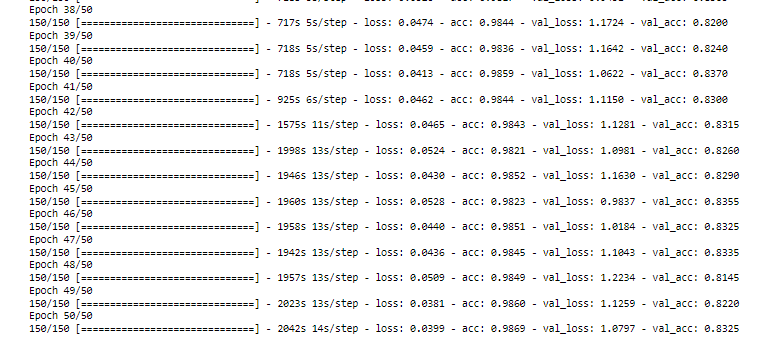

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

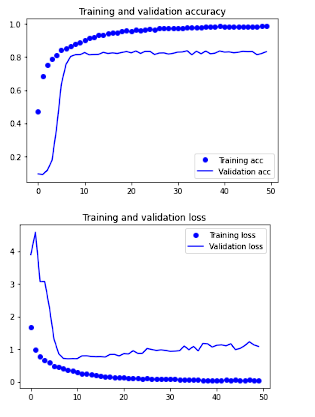

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

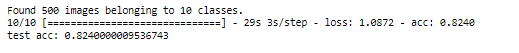

In [72]:
from tensorflow.keras.applications import InceptionV3
img_size =150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                        
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
                        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])
model.summary()
conv_base.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_22 (Flatten)        (None, 18432)             0         
                                                                 
 dense_44 (Dense)            (None, 256)               4718848   
                                                                 
 dense_45 (Dense)            (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 26,489,770
Non-trainable params: 34,432
_________________________________________________________________
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape   

 conv2d_361 (Conv2D)            (None, 16, 16, 64)   76800       ['activation_288[0][0]']         
                                                                                                  
 conv2d_364 (Conv2D)            (None, 16, 16, 96)   82944       ['activation_291[0][0]']         
                                                                                                  
 conv2d_365 (Conv2D)            (None, 16, 16, 32)   6144        ['average_pooling2d_27[0][0]']   
                                                                                                  
 batch_normalization_367 (Batch  (None, 16, 16, 64)  192         ['conv2d_359[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_369 (Batch  (None, 16, 16, 64)  192         ['conv2d_361[0][0]']             
 Normaliza

 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_294[0][0]',         
                                                                  'activation_296[0][0]',         
                                                                  'activation_299[0][0]',         
                                                                  'activation_300[0][0]']         
                                                                                                  
 conv2d_376 (Conv2D)            (None, 16, 16, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_384 (Batch  (None, 16, 16, 64)  192         ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_391 (Batch  (None, 7, 7, 96)    288         ['conv2d_383[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_308 (Activation)    (None, 7, 7, 384)    0           ['batch_normalization_388[0][0]']
                                                                                                  
 activation_311 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_391[0][0]']
                                                                                                  
 max_pooling2d_78 (MaxPooling2D  (None, 7, 7, 288)   0           ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (C

 activation_320 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_400[0][0]']
                                                                                                  
 activation_321 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_401[0][0]']
                                                                                                  
 mixed4 (Concatenate)           (None, 7, 7, 768)    0           ['activation_312[0][0]',         
                                                                  'activation_315[0][0]',         
                                                                  'activation_320[0][0]',         
                                                                  'activation_321[0][0]']         
                                                                                                  
 conv2d_398 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed4[0][0]']                 
          

                                                                  'activation_325[0][0]',         
                                                                  'activation_330[0][0]',         
                                                                  'activation_331[0][0]']         
                                                                                                  
 conv2d_408 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_416 (Batch  (None, 7, 7, 160)   480         ['conv2d_408[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_336 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_416[0][0]']
          

                                                                                                  
 batch_normalization_426 (Batch  (None, 7, 7, 192)   576         ['conv2d_418[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_346 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_426[0][0]']
                                                                                                  
 conv2d_419 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_346[0][0]']         
                                                                                                  
 batch_normalization_427 (Batch  (None, 7, 7, 192)   576         ['conv2d_419[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_427 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_354[0][0]']         
                                                                                                  
 batch_normalization_435 (Batch  (None, 7, 7, 192)   576         ['conv2d_427[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_355 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_435[0][0]']
                                                                                                  
 conv2d_424 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_42

 batch_normalization_444 (Batch  (None, 3, 3, 384)   1152        ['conv2d_436[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_445 (Batch  (None, 3, 3, 384)   1152        ['conv2d_437[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_438 (Conv2D)            (None, 3, 3, 192)    245760      ['average_pooling2d_34[0][0]']   
                                                                                                  
 batch_normalization_438 (Batch  (None, 3, 3, 320)   960         ['conv2d_430[0][0]']             
 Normalization)                                                                                   
          

 conv2d_447 (Conv2D)            (None, 3, 3, 192)    393216      ['average_pooling2d_35[0][0]']   
                                                                                                  
 batch_normalization_447 (Batch  (None, 3, 3, 320)   960         ['conv2d_439[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_369 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_449[0][0]']
                                                                                                  
 activation_370 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_450[0][0]']
                                                                                                  
 activation_373 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_453[0][0]']
          

In [73]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [74]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_22 (Flatten)        (None, 18432)             0         
                                                                 
 dense_44 (Dense)            (None, 256)               4718848   
                                                                 
 dense_45 (Dense)            (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 10,794,954
Non-trainable params: 15,729,248
_________________________________________________________________


In [ ]:
history = model.fit(
      train_generatoraug,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)

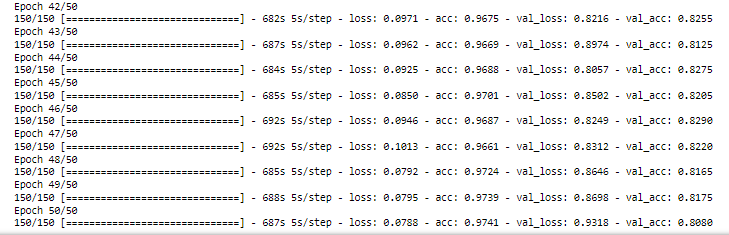

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

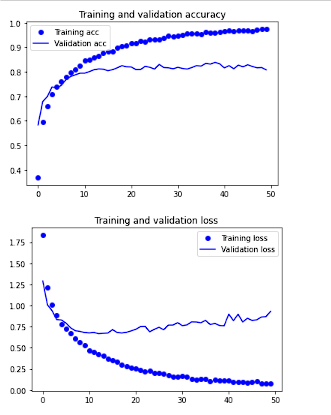

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

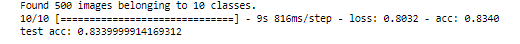

In [69]:
from tensorflow.keras.applications import InceptionV3
img_size =150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                        
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
                        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])
conv_base.trainable = False
model.summary()

conv_base.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_21 (Flatten)        (None, 18432)             0         
                                                                 
 dense_42 (Dense)            (None, 512)               9437696   
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 9,442,826
Non-trainable params: 21,802,784
_________________________________________________________________
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape

 conv2d_267 (Conv2D)            (None, 16, 16, 64)   76800       ['activation_194[0][0]']         
                                                                                                  
 conv2d_270 (Conv2D)            (None, 16, 16, 96)   82944       ['activation_197[0][0]']         
                                                                                                  
 conv2d_271 (Conv2D)            (None, 16, 16, 32)   6144        ['average_pooling2d_18[0][0]']   
                                                                                                  
 batch_normalization_273 (Batch  (None, 16, 16, 64)  192         ['conv2d_265[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_275 (Batch  (None, 16, 16, 64)  192         ['conv2d_267[0][0]']             
 Normaliza

 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_200[0][0]',         
                                                                  'activation_202[0][0]',         
                                                                  'activation_205[0][0]',         
                                                                  'activation_206[0][0]']         
                                                                                                  
 conv2d_282 (Conv2D)            (None, 16, 16, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_290 (Batch  (None, 16, 16, 64)  192         ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_297 (Batch  (None, 7, 7, 96)    288         ['conv2d_289[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_214 (Activation)    (None, 7, 7, 384)    0           ['batch_normalization_294[0][0]']
                                                                                                  
 activation_217 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_297[0][0]']
                                                                                                  
 max_pooling2d_74 (MaxPooling2D  (None, 7, 7, 288)   0           ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (C

 activation_226 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_306[0][0]']
                                                                                                  
 activation_227 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_307[0][0]']
                                                                                                  
 mixed4 (Concatenate)           (None, 7, 7, 768)    0           ['activation_218[0][0]',         
                                                                  'activation_221[0][0]',         
                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_304 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed4[0][0]']                 
          

                                                                  'activation_231[0][0]',         
                                                                  'activation_236[0][0]',         
                                                                  'activation_237[0][0]']         
                                                                                                  
 conv2d_314 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_322 (Batch  (None, 7, 7, 160)   480         ['conv2d_314[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_322[0][0]']
          

                                                                                                  
 batch_normalization_332 (Batch  (None, 7, 7, 192)   576         ['conv2d_324[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_252 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_332[0][0]']
                                                                                                  
 conv2d_325 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_333 (Batch  (None, 7, 7, 192)   576         ['conv2d_325[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_333 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_260[0][0]']         
                                                                                                  
 batch_normalization_341 (Batch  (None, 7, 7, 192)   576         ['conv2d_333[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_261 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_341[0][0]']
                                                                                                  
 conv2d_330 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_33

 batch_normalization_350 (Batch  (None, 3, 3, 384)   1152        ['conv2d_342[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_351 (Batch  (None, 3, 3, 384)   1152        ['conv2d_343[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_344 (Conv2D)            (None, 3, 3, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_344 (Batch  (None, 3, 3, 320)   960         ['conv2d_336[0][0]']             
 Normalization)                                                                                   
          

 conv2d_353 (Conv2D)            (None, 3, 3, 192)    393216      ['average_pooling2d_26[0][0]']   
                                                                                                  
 batch_normalization_353 (Batch  (None, 3, 3, 320)   960         ['conv2d_345[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_275 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_355[0][0]']
                                                                                                  
 activation_276 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_356[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_359[0][0]']
          

In [70]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [71]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_21 (Flatten)        (None, 18432)             0         
                                                                 
 dense_42 (Dense)            (None, 512)               9437696   
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 15,516,362
Non-trainable params: 15,729,248
_________________________________________________________________


In [ ]:
history = model.fit(
      train_generatoraug,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)

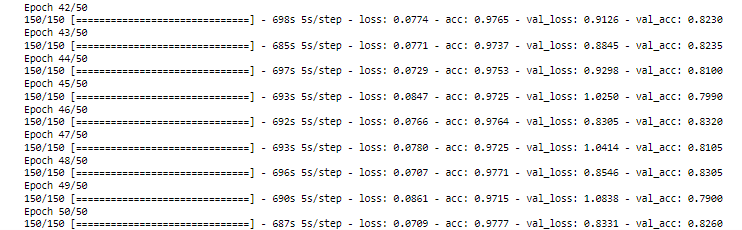

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

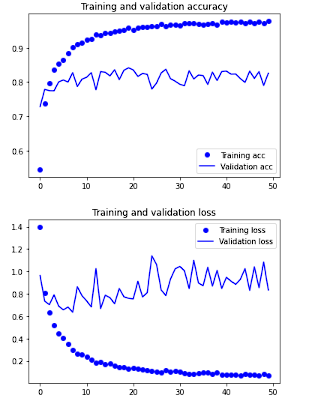

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

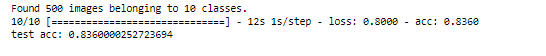

In [94]:
from tensorflow.keras.applications import InceptionV3
img_size =150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                        
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',kernel_regularizer ="l2"))
model.add(layers.Dense(10, activation='softmax'))
                        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])
model.summary()
conv_base.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_25 (Flatten)        (None, 18432)             0         
                                                                 
 dense_50 (Dense)            (None, 256)               4718848   
                                                                 
 dense_51 (Dense)            (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 26,489,770
Non-trainable params: 34,432
_________________________________________________________________
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape   

 conv2d_643 (Conv2D)            (None, 16, 16, 64)   76800       ['activation_570[0][0]']         
                                                                                                  
 conv2d_646 (Conv2D)            (None, 16, 16, 96)   82944       ['activation_573[0][0]']         
                                                                                                  
 conv2d_647 (Conv2D)            (None, 16, 16, 32)   6144        ['average_pooling2d_54[0][0]']   
                                                                                                  
 batch_normalization_649 (Batch  (None, 16, 16, 64)  192         ['conv2d_641[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_651 (Batch  (None, 16, 16, 64)  192         ['conv2d_643[0][0]']             
 Normaliza

 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_576[0][0]',         
                                                                  'activation_578[0][0]',         
                                                                  'activation_581[0][0]',         
                                                                  'activation_582[0][0]']         
                                                                                                  
 conv2d_658 (Conv2D)            (None, 16, 16, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_666 (Batch  (None, 16, 16, 64)  192         ['conv2d_658[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_673 (Batch  (None, 7, 7, 96)    288         ['conv2d_665[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_590 (Activation)    (None, 7, 7, 384)    0           ['batch_normalization_670[0][0]']
                                                                                                  
 activation_593 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_673[0][0]']
                                                                                                  
 max_pooling2d_90 (MaxPooling2D  (None, 7, 7, 288)   0           ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (C

 activation_602 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_682[0][0]']
                                                                                                  
 activation_603 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_683[0][0]']
                                                                                                  
 mixed4 (Concatenate)           (None, 7, 7, 768)    0           ['activation_594[0][0]',         
                                                                  'activation_597[0][0]',         
                                                                  'activation_602[0][0]',         
                                                                  'activation_603[0][0]']         
                                                                                                  
 conv2d_680 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed4[0][0]']                 
          

                                                                  'activation_607[0][0]',         
                                                                  'activation_612[0][0]',         
                                                                  'activation_613[0][0]']         
                                                                                                  
 conv2d_690 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_698 (Batch  (None, 7, 7, 160)   480         ['conv2d_690[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_618 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_698[0][0]']
          

                                                                                                  
 batch_normalization_708 (Batch  (None, 7, 7, 192)   576         ['conv2d_700[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_628 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_708[0][0]']
                                                                                                  
 conv2d_701 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_628[0][0]']         
                                                                                                  
 batch_normalization_709 (Batch  (None, 7, 7, 192)   576         ['conv2d_701[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_709 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_636[0][0]']         
                                                                                                  
 batch_normalization_717 (Batch  (None, 7, 7, 192)   576         ['conv2d_709[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_637 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_717[0][0]']
                                                                                                  
 conv2d_706 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_71

 batch_normalization_726 (Batch  (None, 3, 3, 384)   1152        ['conv2d_718[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_727 (Batch  (None, 3, 3, 384)   1152        ['conv2d_719[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_720 (Conv2D)            (None, 3, 3, 192)    245760      ['average_pooling2d_61[0][0]']   
                                                                                                  
 batch_normalization_720 (Batch  (None, 3, 3, 320)   960         ['conv2d_712[0][0]']             
 Normalization)                                                                                   
          

 conv2d_729 (Conv2D)            (None, 3, 3, 192)    393216      ['average_pooling2d_62[0][0]']   
                                                                                                  
 batch_normalization_729 (Batch  (None, 3, 3, 320)   960         ['conv2d_721[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_651 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_731[0][0]']
                                                                                                  
 activation_652 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_732[0][0]']
                                                                                                  
 activation_655 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_735[0][0]']
          

In [95]:
for layer in conv_base.layers:
    layer.trainable = False

In [96]:
history = model.fit(
      train_generatoraug,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/50
150/150 [==============================] - 406s 3s/step - loss: 6.8031 - acc: 0.3771 - val_loss: 6.1430 - val_acc: 0.5885
Epoch 2/50
150/150 [==============================] - 387s 3s/step - loss: 6.0405 - acc: 0.5941 - val_loss: 5.7427 - val_acc: 0.6725
Epoch 3/50
150/150 [==============================] - 391s 3s/step - loss: 5.6364 - acc: 0.6719 - val_loss: 5.4931 - val_acc: 0.7015
Epoch 4/50
150/150 [==============================] - 395s 3s/step - loss: 5.3421 - acc: 0.7095 - val_loss: 5.2710 - val_acc: 0.7085
Epoch 5/50
150/150 [==============================] - 390s 3s/step - loss: 5.0863 - acc: 0.7281 - val_loss: 5.0303 - val_acc: 0.7390
Epoch 6/50
150/150 [==============================] - 389s 3s/step - loss: 4.8429 - acc: 0.7572 - val_loss: 4.7708 - val_acc: 0.7700
Epoch 7/50
150/150 [==============================] - 389s 3s/step - loss: 4.5963 - acc: 0.7785 - val_loss: 4.5936 - val_acc: 0.7715
Epoch 8/50
150/150 [==============================] - 385s 3s/step - 

In [97]:
model.save('candidatept.h5')

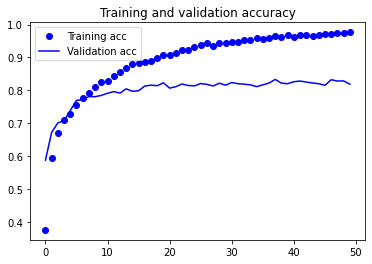

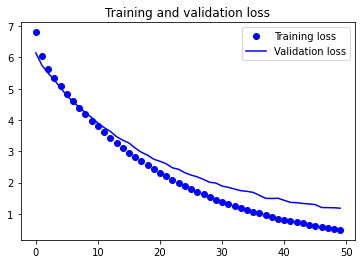

In [98]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [107]:
model2 = keras.models.load_model('candidatept.h5')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 5s 409ms/step - loss: 1.0630 - acc: 0.8600
test acc: 0.8600000143051147


## Step 3 – Evaluate the Developed Models using Testing Images

In [99]:
# Model #1
modela = keras.models.load_model('candidate1.2.h5')
modelb = keras.models.load_model('candidate2.h5')
modelc = keras.models.load_model('candidate4.h5')
modeld = keras.models.load_model('candidate5.h5')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = modela.evaluate(test_generator, steps=10)
print('test acc:', test_acc)


Found 500 images belonging to 10 classes.
10/10 [==============================] - 3s 226ms/step - loss: 1.8216 - acc: 0.6820
test acc: 0.6819999814033508


In [100]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = modelb.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 212ms/step - loss: 1.8234 - acc: 0.6320
test acc: 0.6320000290870667


In [101]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = modelc.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 3s 293ms/step - loss: 1.4680 - acc: 0.7140
test acc: 0.7139999866485596


In [102]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = modeld.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 3s 299ms/step - loss: 1.4816 - acc: 0.7360
test acc: 0.7360000014305115


In [108]:
# Model #2
model2 = keras.models.load_model('candidatept.h5')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
10/10 [==============================] - 6s 431ms/step - loss: 1.0630 - acc: 0.8600
test acc: 0.8600000143051147


In [109]:
# Save the best model


model2.save('food_model_best.h5')


## Step 4  – Use the best model to make prediction

In [110]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [111]:
# Load the food list (in alphabetical order)
with open('8.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'churros', 'clam_chowder', 'crab_cakes', 'fish_and_chips', 'lasagna', 'pancakes', 'pork_chop', 'ramen', 'samosa']


In [112]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

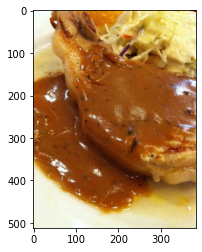

1/1 [==============================] - 1s 1s/step
The prediction is:  pork_chop 

    beet_salad  churros  clam_chowder    crab_cakes  fish_and_chips  \
0    0.000005  0.00035  4.917830e-07  5.715349e-08        0.000019   

        lasagna  pancakes  pork_chop     ramen    samosa  
0  7.913873e-07  0.000002   0.999618  0.000003  0.000002  


In [113]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'porkchop.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

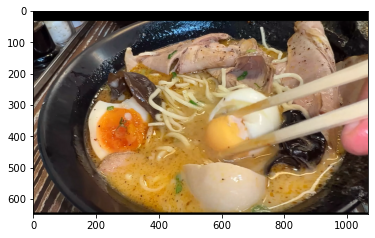

1/1 [==============================] - 0s 66ms/step
The prediction is:  ramen 

      beet_salad       churros  clam_chowder    crab_cakes  fish_and_chips  \
0  8.933458e-08  1.209288e-09  8.571353e-08  3.745286e-10    1.089995e-09   

        lasagna      pancakes     pork_chop  ramen        samosa  
0  1.434306e-08  6.420133e-09  6.277338e-08    1.0  7.752032e-10  


In [114]:
import matplotlib.pyplot as plt
img = 'ramen.png' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

In [ ]:
https://www.youtube.com/watch?v=O51r023kqXk 11:10